In [28]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns


In [29]:

url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [31]:
df.shape

(48895, 16)

In [32]:
df.isna().sum().sort_values(ascending = False)

last_review                       10052
reviews_per_month                 10052
host_name                            21
name                                 16
id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
del df['latitude']
del df['longitude']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   room_type                       48895 non-null  object 
 7   price                           48895 non-null  int64  
 8   minimum_nights                  48895 non-null  int64  
 9   number_of_reviews               48895 non-null  int64  
 10  last_review                     38843 non-null  object 
 11  reviews_per_month               38843 non-null  float64
 12  calculated_host_listings_count  

### Conclusiones:

Mi dataset contiene 48895 filas y 16 columnas con los siguientes tipos de datos:
float64(1), int64(7), object(6).


In [34]:
df = df.drop(['name', 'host_id', 'host_name', 'id'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   room_type                       48895 non-null  object 
 3   price                           48895 non-null  int64  
 4   minimum_nights                  48895 non-null  int64  
 5   number_of_reviews               48895 non-null  int64  
 6   last_review                     38843 non-null  object 
 7   reviews_per_month               38843 non-null  float64
 8   calculated_host_listings_count  48895 non-null  int64  
 9   availability_365                48895 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 3.7+ MB


En el paso anterior he eliminado las columnas vacias
, y a continuacion vamos a visualizar los datos
restantes.

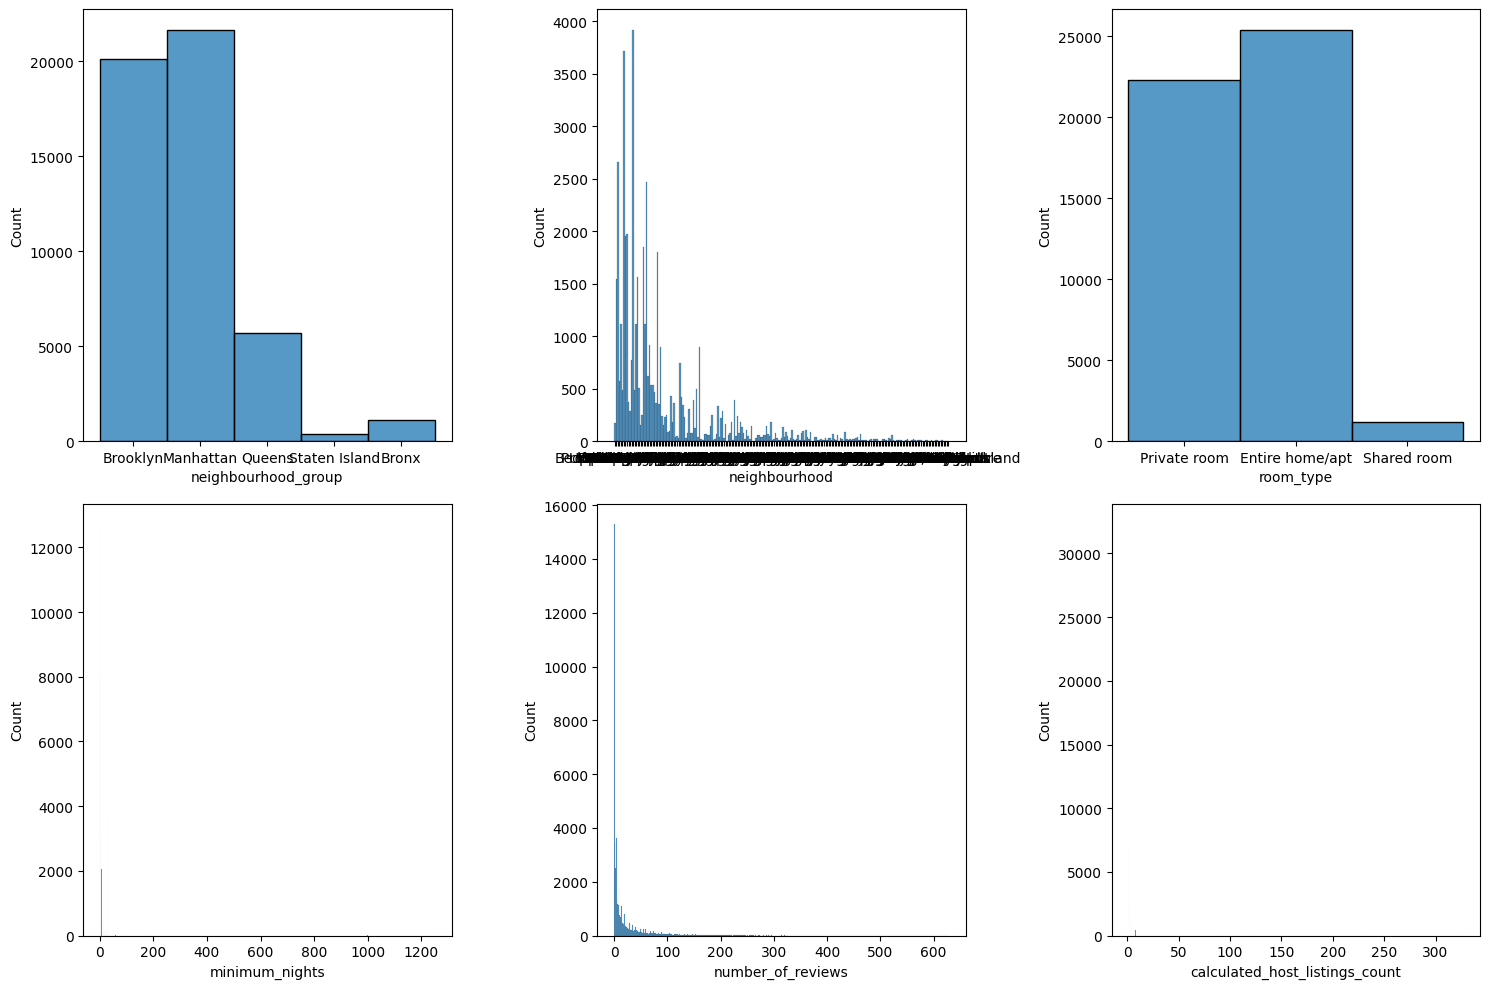

In [35]:
fig, axis = plt.subplots(2, 3, figsize=(15, 10))

sns.histplot(df, x="neighbourhood_group", ax=axis[0, 0])
sns.histplot(df, x="neighbourhood", ax=axis[0, 1])
sns.histplot(df, x="room_type", ax=axis[0, 2])
sns.histplot(df, x="minimum_nights", ax=axis[1, 0])
sns.histplot(df, x="number_of_reviews", ax=axis[1, 1])
sns.histplot(df, x="calculated_host_listings_count", ax=axis[1, 2])

plt.tight_layout()
plt.show()


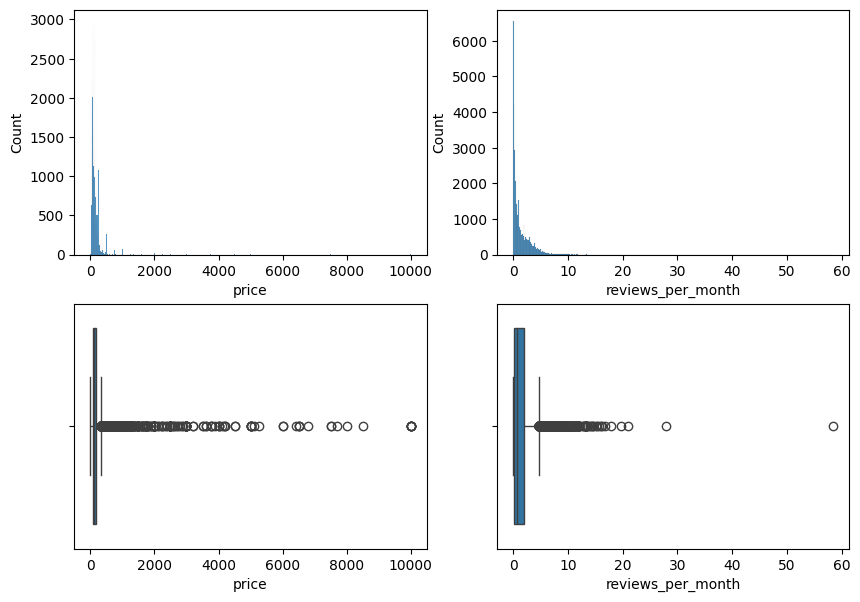

In [36]:

fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.histplot(df, x="price", ax=axis[0, 0])
sns.boxplot(df, x="price", ax=axis[1, 0])

sns.histplot(df, x="reviews_per_month", ax=axis[0, 1])
sns.boxplot(df, x="reviews_per_month", ax=axis[1, 1])

plt.show()


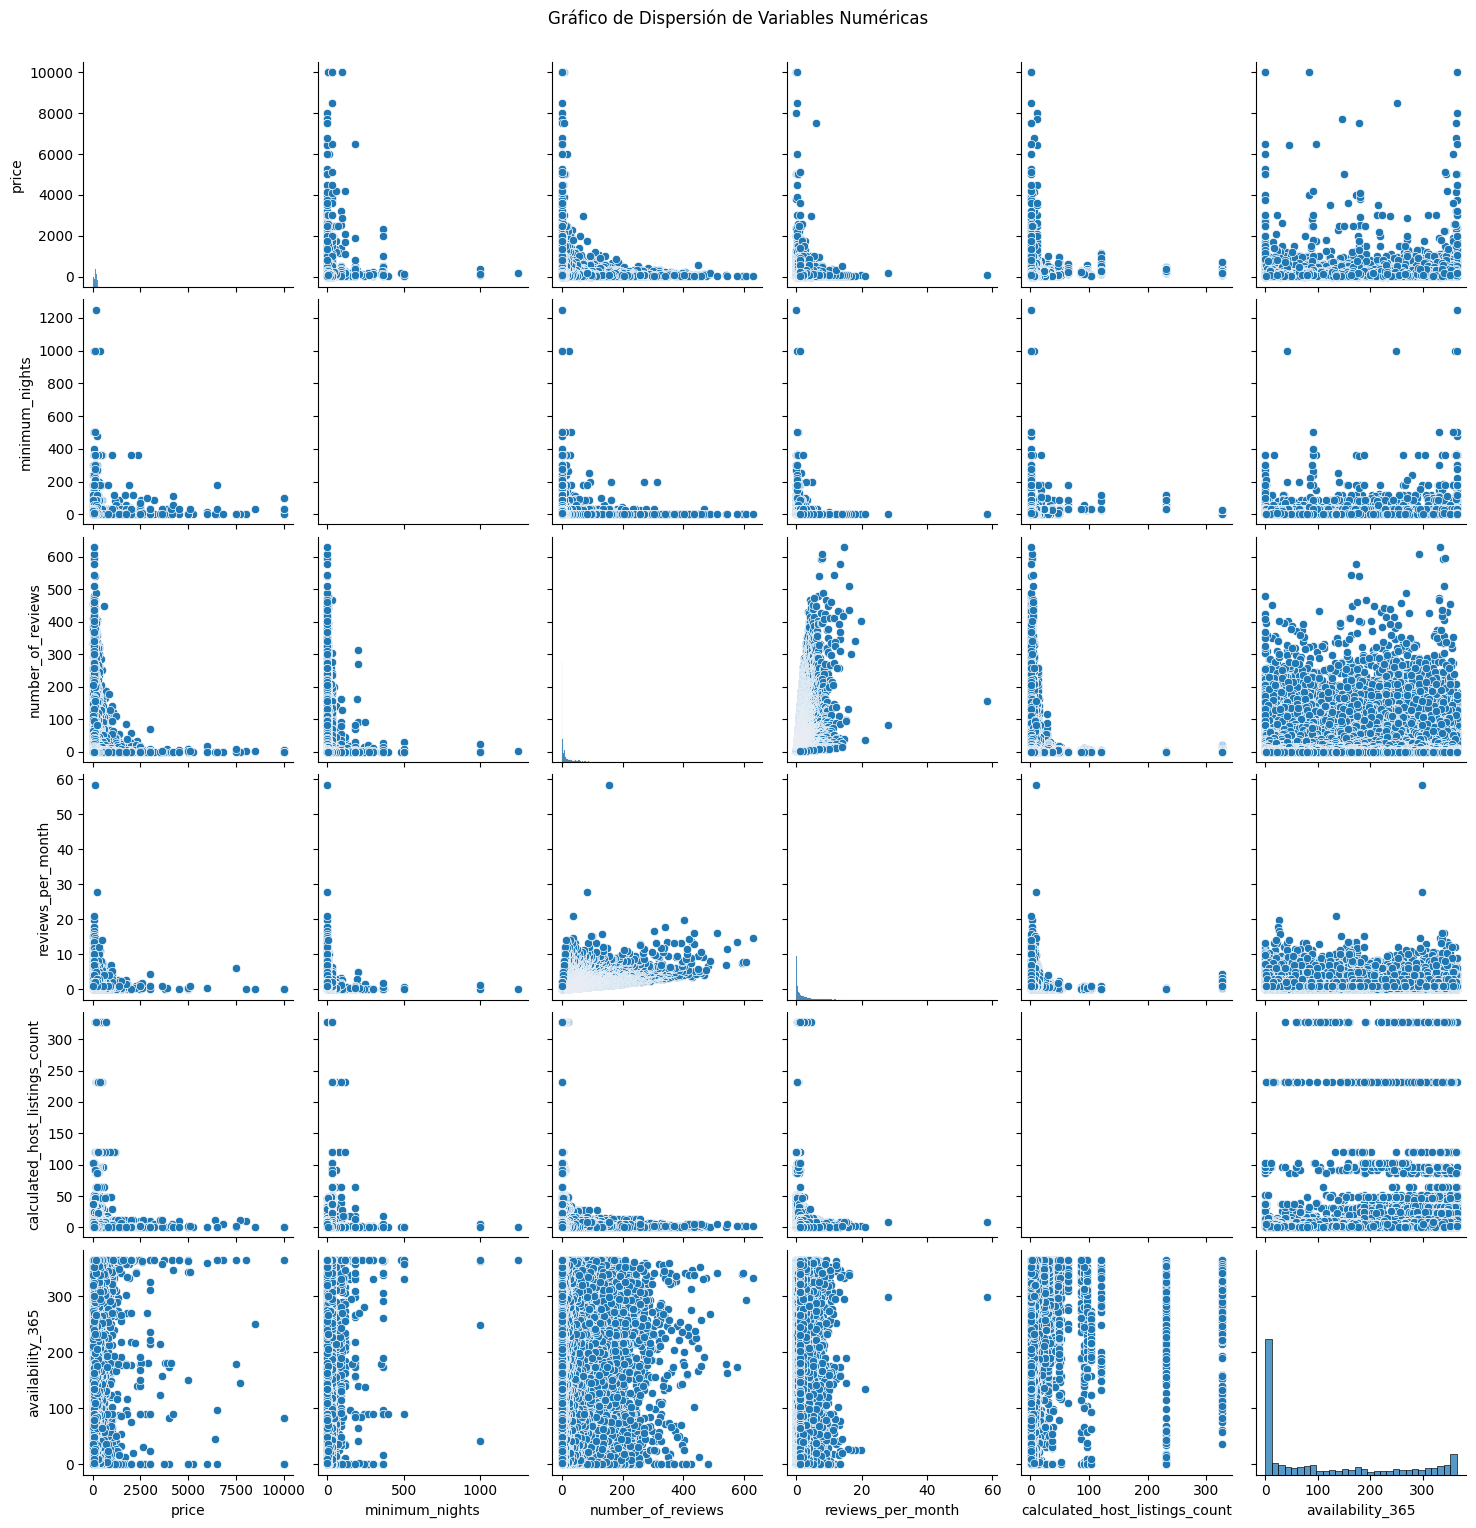

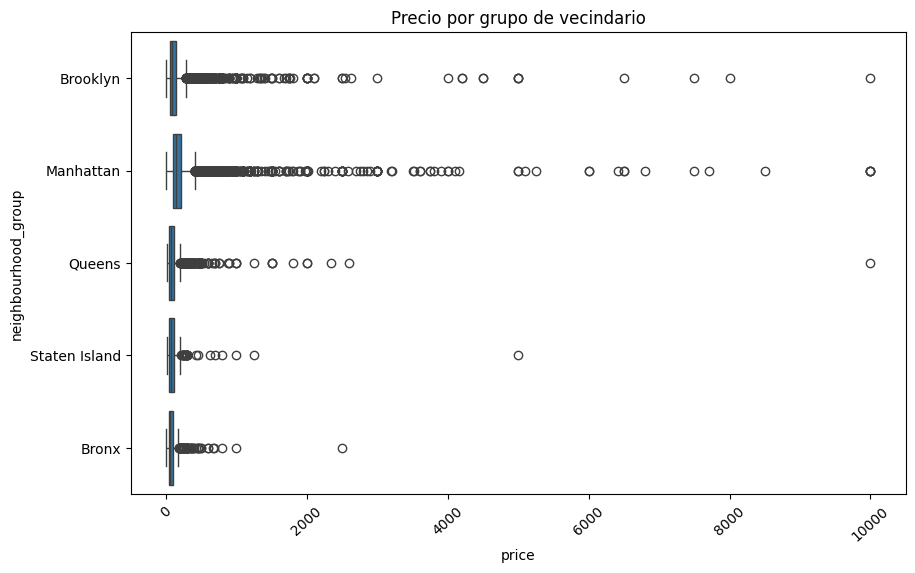

In [37]:
sns.pairplot(df, vars=['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                    'calculated_host_listings_count', 'availability_365'])
plt.suptitle('Gráfico de Dispersión de Variables Numéricas', y=1.02)
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(y='neighbourhood_group', x='price', data=df)
plt.title('Precio por grupo de vecindario')
plt.xticks(rotation=42)
plt.show()

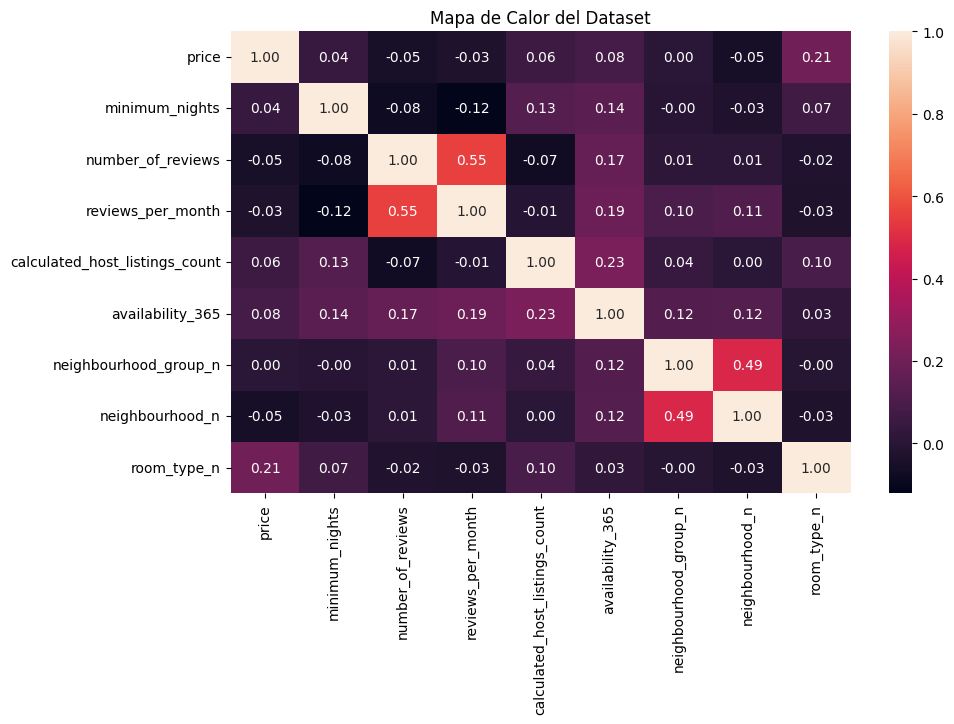

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['int64', 'float64']) 
df_numeric["neighbourhood_group_n"] = pd.factorize(df["neighbourhood_group"])[0]
df_numeric["neighbourhood_n"] = pd.factorize(df["neighbourhood"])[0]
df_numeric["room_type_n"] = pd.factorize(df["room_type"])[0]

plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, fmt=".2f")
plt.title('Mapa de Calor del Dataset')
plt.show()


In [39]:
df.describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


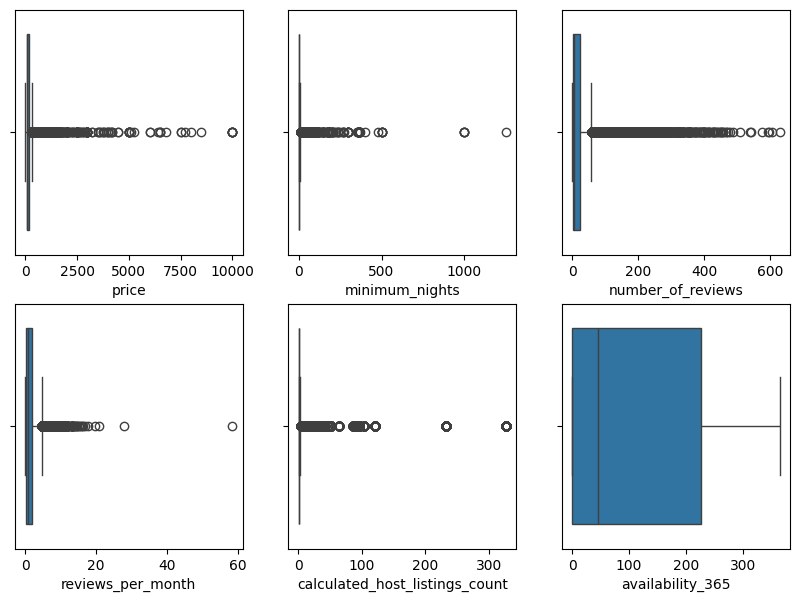

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (10, 7))

sns.boxplot(df, x = "price", ax = axis[0, 0])
sns.boxplot(df, x = "minimum_nights", ax = axis[0, 1])
sns.boxplot(df, x = "number_of_reviews", ax = axis[0, 2])
sns.boxplot(df, x = "reviews_per_month", ax = axis[1, 0])
sns.boxplot(df, x = "calculated_host_listings_count", ax = axis[1, 1])
sns.boxplot(df, x = "availability_365", ax = axis[1, 2])
plt.show()

In [41]:
descr = {
    "25%": 69,
    "75%": 175
}
fare_iqr = descr["75%"] - descr["25%"]

upper_l = descr["75%"] + 1.5 * fare_iqr
lower_l = descr["25%"] - 1.5 * fare_iqr

lower_l = 0

print("Lower Limit:", lower_l)
print("Upper Limit:", upper_l)

outliers = df[df.price >= upper_l]
outliers


Lower Limit: 0
Upper Limit: 334.0


,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
61,Manhattan,Chelsea,Entire home/apt,375,180,5,2018-11-03,0.12,1,180
85,Brooklyn,Brooklyn Heights,Entire home/apt,800,1,25,2016-08-04,0.24,1,7
103,Manhattan,West Village,Entire home/apt,500,4,46,2019-05-18,0.55,2,243
114,Manhattan,East Village,Entire home/apt,350,2,7,2017-08-09,0.06,4,298
121,Brooklyn,South Slope,Entire home/apt,400,2,16,2018-12-30,0.24,2,216
...,...,...,...,...,...,...,...,...,...,...
48758,Queens,Long Island City,Entire home/apt,350,2,0,NaN,NaN,1,364
48833,Manhattan,Financial District,Entire home/apt,475,2,0,NaN,NaN,1,64
48839,Brooklyn,Sheepshead Bay,Private room,800,1,0,NaN,NaN,1,23
48842,Manhattan,Chelsea,Entire home/apt,350,1,0,NaN,NaN,1,9


In [42]:
df.columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [43]:
df = df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']]
df.isnull().sum()

neighbourhood_group                   0
neighbourhood                         0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [44]:

df_no_outliers = df[(df.price >= lower_l) & (df.price <= upper_l)]
print(df_no_outliers)
df.columns


      neighbourhood_group       neighbourhood        room_type  price  \
0                Brooklyn          Kensington     Private room    149   
1               Manhattan             Midtown  Entire home/apt    225   
2               Manhattan              Harlem     Private room    150   
3                Brooklyn        Clinton Hill  Entire home/apt     89   
4               Manhattan         East Harlem  Entire home/apt     80   
...                   ...                 ...              ...    ...   
48890            Brooklyn  Bedford-Stuyvesant     Private room     70   
48891            Brooklyn            Bushwick     Private room     40   
48892           Manhattan              Harlem  Entire home/apt    115   
48893           Manhattan      Hell's Kitchen      Shared room     55   
48894           Manhattan      Hell's Kitchen     Private room     90   

       minimum_nights  number_of_reviews last_review  reviews_per_month  \
0                   1                  9  2018-1

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

predictoras = ['neighbourhood_group', 'neighbourhood', 'room_type',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']
target = 'price'

X = df[predictoras]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train


,neighbourhood_group,neighbourhood,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
21681,Queens,Cambria Heights,Entire home/apt,2,65,2019-06-26,2.33,1,263
26482,Brooklyn,Sunset Park,Entire home/apt,2,24,2019-06-23,1.15,1,12
20859,Manhattan,Kips Bay,Private room,5,2,2017-07-16,0.07,1,0
45464,Brooklyn,Bedford-Stuyvesant,Private room,1,4,2019-06-23,2.86,3,0
22583,Manhattan,Midtown,Shared room,3,6,2017-10-08,0.24,1,0
...,...,...,...,...,...,...,...,...,...
11284,Manhattan,Washington Heights,Shared room,1,0,NaN,NaN,1,0
44732,Manhattan,Chelsea,Private room,2,4,2019-06-30,1.90,1,76
38158,Manhattan,Upper West Side,Entire home/apt,30,1,2019-04-12,0.34,5,261
860,Manhattan,Upper West Side,Entire home/apt,2,11,2019-06-09,0.13,1,2


In [49]:
X_train, X_test, y_train, y_test


(      neighbourhood_group       neighbourhood        room_type  \
 21681              Queens     Cambria Heights  Entire home/apt   
 26482            Brooklyn         Sunset Park  Entire home/apt   
 20859           Manhattan            Kips Bay     Private room   
 45464            Brooklyn  Bedford-Stuyvesant     Private room   
 22583           Manhattan             Midtown      Shared room   
 ...                   ...                 ...              ...   
 11284           Manhattan  Washington Heights      Shared room   
 44732           Manhattan             Chelsea     Private room   
 38158           Manhattan     Upper West Side  Entire home/apt   
 860             Manhattan     Upper West Side  Entire home/apt   
 15795              Queens    Long Island City  Entire home/apt   
 
        minimum_nights  number_of_reviews last_review  reviews_per_month  \
 21681               2                 65  2019-06-26               2.33   
 26482               2                 24 